【例题】：y=2x+1

In [1]:
%config IPCompleter.greedy=True
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import tensorflow as tf

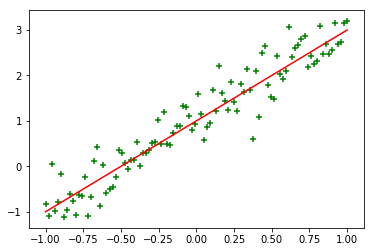

In [2]:
np.random.seed(5)
x_data=np.linspace(-1,1,100)
y_data=2.0*x_data+1.0+np.random.randn(*x_data.shape)*0.4
plt.scatter(x_data,y_data,c='green',marker='+')
plt.plot(x_data,2*x_data+1,'r-')

In [3]:
x=tf.placeholder(tf.float32,name='x')
y=tf.placeholder(tf.float32,name='y')

w=tf.Variable(1.0,name='w0')
b=tf.Variable(0.0,name='b0')

def model(x,w,b):
    return tf.multiply(x,w)+b

pred=model(x,w,b)

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
lr=0.05
epochs=10

In [5]:
loss_function=tf.reduce_mean(tf.square(y-pred))
optimizer=tf.train.GradientDescentOptimizer(lr).minimize(loss_function)

Instructions for updating:
Use tf.cast instead.


In [6]:
sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)

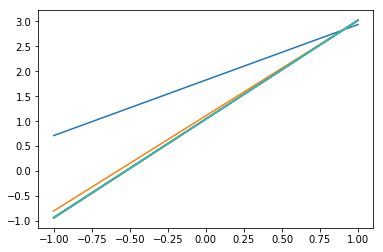

In [7]:
for epoch in range(epochs):
    for xs,ys in zip(x_data,y_data):
        _,loss=sess.run([optimizer,loss_function],feed_dict={x:xs,y:ys})
    wtemp=w.eval(session=sess)
    btemp=b.eval(session=sess)
    plt.plot(x_data,wtemp*x_data+btemp)

In [8]:
print ('w:', sess.run(w))
print ('b:', sess.run(b))

w: 1.9822965
b: 1.0420128


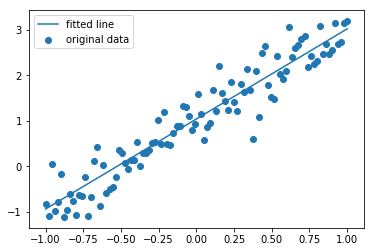

In [9]:
plt.scatter(x_data,y_data,label='original data')
plt.plot(x_data,x_data*sess.run(w)+sess.run(b),label='fitted line')
plt.legend(loc=2)

【第六讲】作业：y=3.1234*x+2.98

🍃
每一轮训练（共10轮），都对500个数据依次优化w、b、loss
也就是说，每一步（共5000步），都在更新w、b、loss

In [10]:
%config IPCompleter.greedy=True
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import tensorflow as tf

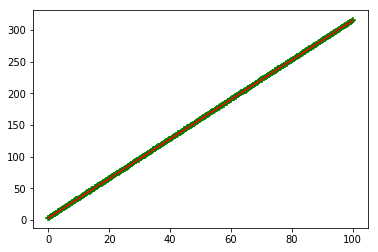

In [11]:
np.random.seed(5)
x_data=np.linspace(0,100,500)
y_data=3.1234*x_data+2.98+np.random.randn(*x_data.shape)*0.4
plt.scatter(x_data,y_data,c='green',marker='+')
plt.plot(x_data,3.1234*x_data+2.98,'r-')

In [12]:
x=tf.placeholder(tf.float32,name='x')
y=tf.placeholder(tf.float32,name='y')

w=tf.Variable(1.0,name='w0')
b=tf.Variable(0.0,name='b0')

def model(x,w,b):
    return tf.multiply(x,w)+b

pred=model(x,w,b)

In [13]:
lr=0.003
epochs=10

⚠️用梯度下降作为优化器，输出的loss几乎都是nan值（试了多个lr都一样....）
用Adam作为优化器就可以正常输出loss

In [14]:
loss_function=tf.reduce_mean(tf.square(y-pred))
optimizer=tf.train.AdamOptimizer(lr).minimize(loss_function)
# optimizer=tf.train.GradientDescentOptimizer(lr).minimize(loss_function)

In [15]:
#【创建会话】
sess=tf.Session()
init=tf.global_variables_initializer()

In [16]:
#【⚠️设置日志存储目录】
# tf.reset_default_graph()
logdir='/Users/zhangying/Desktop/tf-exercise/exercise-6-单变量线性回归'

In [17]:
#【启动会话】
sess.run(init)

In [18]:
#【⚠️创建摘要文件写入器FileWriter】
writer=tf.summary.FileWriter(logdir,tf.get_default_graph())
writer.close()

<img src='./tensorboard-flowchart.png'>

第 1轮 第  20步 损失122.3996
第 1轮 第  40步 损失363.1188
第 1轮 第  60步 损失640.9922
第 1轮 第  80步 损失970.0757
第 1轮 第 100步 损失1334.2844
第 1轮 第 120步 损失1641.1669
第 1轮 第 140步 损失1972.4789
第 1轮 第 160步 损失2141.0972
第 1轮 第 180步 损失2258.4016
第 1轮 第 200步 损失2388.6738
第 1轮 第 220步 损失2322.5593
第 1轮 第 240步 损失2244.4666
第 1轮 第 260步 损失2157.8176
第 1轮 第 280步 损失1943.9520
第 1轮 第 300步 损失1729.4689
第 1轮 第 320步 损失1478.1852
第 1轮 第 340步 损失1213.4458
第 1轮 第 360步 损失968.9993
第 1轮 第 380步 损失726.7029
第 1轮 第 400步 损失563.2902
第 1轮 第 420步 损失353.2761
第 1轮 第 440步 损失234.5783
第 1轮 第 460步 损失139.6931
第 1轮 第 480步 损失76.9759
第 1轮 第 500步 损失42.8256
第 2轮 第 520步 损失3.2898
第 2轮 第 540步 损失5.3486
第 2轮 第 560步 损失3.4895
第 2轮 第 580步 损失3.3945
第 2轮 第 600步 损失5.0497
第 2轮 第 620步 损失4.5261
第 2轮 第 640步 损失7.7518
第 2轮 第 660步 损失5.0179
第 2轮 第 680步 损失3.5791
第 2轮 第 700步 损失5.8488
第 2轮 第 720步 损失2.7190
第 2轮 第 740步 损失2.0682
第 2轮 第 760步 损失3.1334
第 2轮 第 780步 损失1.5731
第 2轮 第 800步 损失1.2994
第 2轮 第 820步 损失0.7280
第 2轮 第 840步 损失0.2483
第 2轮 第 860步 损失0.1332
第 2轮 第 880步 损失0.0004
第 2轮 第 900步 损失0

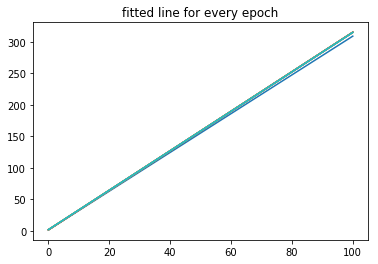

In [19]:
step=0
loss_list=[]
for epoch in range(epochs):
    for xs,ys in zip(x_data,y_data):
        _,loss=sess.run([optimizer,loss_function],feed_dict={x:xs,y:ys})
        loss_list.append(loss)
        step+=1
        if step%20==0:
            print ('第%2d轮'%(epoch+1),'第%4d步'%step,'损失%.4f'%loss)
    wtemp=w.eval(session=sess)
    btemp=b.eval(session=sess)
    plt.plot(x_data,wtemp*x_data+btemp)
    plt.title('fitted line for every epoch')
    

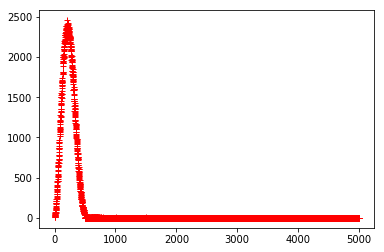

In [20]:
plt.plot(range(1,5001),loss_list,'r+')

In [21]:
print ('y=%.4f when x=5.79'%sess.run(pred,feed_dict={x:5.79}))

y=20.1648 when x=5.79


"===================我是一条分界线你难道看不出来吗？==================="
"===================我是一条分界线你难道看不出来吗？==================="
"===================我是一条分界线你难道看不出来吗？==================="

 🍃每一轮训练（共10轮），都对500个数据一起优化w、b、loss

也就是说，共更新w、b、loss 10次，结果如下：
第 1轮 w:1.0030 b:0.0030 损失15687.0957
第 2轮 w:1.0060 b:0.0060 损失15643.0664
第 3轮 w:1.0090 b:0.0090 损失15599.0996
第 4轮 w:1.0120 b:0.0120 损失15555.2002
第 5轮 w:1.0150 b:0.0150 损失15511.3643
第 6轮 w:1.0180 b:0.0180 损失15467.5938
第 7轮 w:1.0210 b:0.0210 损失15423.8926
第 8轮 w:1.0240 b:0.0240 损失15380.2617
第 9轮 w:1.0270 b:0.0270 损失15336.6973
第10轮 w:1.0300 b:0.0300 损失15293.2061

损失虽然很大，但一直在下降。所以不妨把epochs设为5000看看
（注意咯：用的还是Adam优化器+记得要重新初始化）

In [22]:
lr=0.003
epochs=5000

第 1轮 w:3.1310 b:2.0367 损失0.5345
第 2轮 w:3.1311 b:2.0369 损失0.5329
第 3轮 w:3.1312 b:2.0371 损失0.5289
第 4轮 w:3.1314 b:2.0373 损失0.5229
第 5轮 w:3.1316 b:2.0376 损失0.5153
第 6轮 w:3.1318 b:2.0379 损失0.5064
第 7轮 w:3.1321 b:2.0383 损失0.4965
第 8轮 w:3.1324 b:2.0387 损失0.4862
第 9轮 w:3.1327 b:2.0391 损失0.4755
第10轮 w:3.1330 b:2.0395 损失0.4650
第11轮 w:3.1333 b:2.0400 损失0.4546
第12轮 w:3.1336 b:2.0405 损失0.4448
第13轮 w:3.1340 b:2.0409 损失0.4355
第14轮 w:3.1343 b:2.0414 损失0.4270
第15轮 w:3.1346 b:2.0419 损失0.4192
第16轮 w:3.1349 b:2.0424 损失0.4123
第17轮 w:3.1352 b:2.0429 损失0.4062
第18轮 w:3.1355 b:2.0434 损失0.4009
第19轮 w:3.1358 b:2.0439 损失0.3964
第20轮 w:3.1361 b:2.0443 损失0.3927
第21轮 w:3.1363 b:2.0448 损失0.3897
第22轮 w:3.1366 b:2.0453 损失0.3872
第23轮 w:3.1368 b:2.0457 损失0.3854
第24轮 w:3.1370 b:2.0461 损失0.3840
第25轮 w:3.1372 b:2.0466 损失0.3830
第26轮 w:3.1374 b:2.0470 损失0.3823
第27轮 w:3.1375 b:2.0474 损失0.3819
第28轮 w:3.1377 b:2.0478 损失0.3817
第29轮 w:3.1378 b:2.0482 损失0.3817
第30轮 w:3.1379 b:2.0486 损失0.3817
第31轮 w:3.1380 b:2.0489 损失0.3819
第32轮 w:3

第285轮 w:3.1363 b:2.1283 损失0.3448
第286轮 w:3.1363 b:2.1287 损失0.3446
第287轮 w:3.1363 b:2.1290 损失0.3445
第288轮 w:3.1363 b:2.1293 损失0.3443
第289轮 w:3.1362 b:2.1296 损失0.3442
第290轮 w:3.1362 b:2.1299 损失0.3441
第291轮 w:3.1362 b:2.1303 损失0.3439
第292轮 w:3.1362 b:2.1306 损失0.3438
第293轮 w:3.1362 b:2.1309 损失0.3436
第294轮 w:3.1362 b:2.1312 损失0.3435
第295轮 w:3.1362 b:2.1315 损失0.3434
第296轮 w:3.1362 b:2.1319 损失0.3432
第297轮 w:3.1362 b:2.1322 损失0.3431
第298轮 w:3.1362 b:2.1325 损失0.3429
第299轮 w:3.1362 b:2.1328 损失0.3428
第300轮 w:3.1362 b:2.1332 损失0.3427
第301轮 w:3.1362 b:2.1335 损失0.3425
第302轮 w:3.1362 b:2.1338 损失0.3424
第303轮 w:3.1362 b:2.1341 损失0.3422
第304轮 w:3.1362 b:2.1344 损失0.3421
第305轮 w:3.1362 b:2.1348 损失0.3420
第306轮 w:3.1362 b:2.1351 损失0.3418
第307轮 w:3.1362 b:2.1354 损失0.3417
第308轮 w:3.1362 b:2.1357 损失0.3415
第309轮 w:3.1361 b:2.1360 损失0.3414
第310轮 w:3.1361 b:2.1364 损失0.3413
第311轮 w:3.1361 b:2.1367 损失0.3411
第312轮 w:3.1361 b:2.1370 损失0.3410
第313轮 w:3.1361 b:2.1373 损失0.3408
第314轮 w:3.1361 b:2.1377 损失0.3407
第315轮 w:3.

第558轮 w:3.1349 b:2.2172 损失0.3078
第559轮 w:3.1349 b:2.2175 损失0.3077
第560轮 w:3.1349 b:2.2179 损失0.3076
第561轮 w:3.1349 b:2.2182 损失0.3075
第562轮 w:3.1349 b:2.2185 损失0.3073
第563轮 w:3.1349 b:2.2188 损失0.3072
第564轮 w:3.1349 b:2.2192 损失0.3071
第565轮 w:3.1349 b:2.2195 损失0.3069
第566轮 w:3.1349 b:2.2198 损失0.3068
第567轮 w:3.1349 b:2.2202 损失0.3067
第568轮 w:3.1349 b:2.2205 损失0.3065
第569轮 w:3.1349 b:2.2208 损失0.3064
第570轮 w:3.1349 b:2.2212 损失0.3063
第571轮 w:3.1349 b:2.2215 损失0.3062
第572轮 w:3.1349 b:2.2218 损失0.3060
第573轮 w:3.1349 b:2.2221 损失0.3059
第574轮 w:3.1348 b:2.2225 损失0.3058
第575轮 w:3.1348 b:2.2228 损失0.3056
第576轮 w:3.1348 b:2.2231 损失0.3055
第577轮 w:3.1348 b:2.2235 损失0.3054
第578轮 w:3.1348 b:2.2238 损失0.3053
第579轮 w:3.1348 b:2.2241 损失0.3051
第580轮 w:3.1348 b:2.2245 损失0.3050
第581轮 w:3.1348 b:2.2248 损失0.3049
第582轮 w:3.1348 b:2.2251 损失0.3047
第583轮 w:3.1348 b:2.2255 损失0.3046
第584轮 w:3.1348 b:2.2258 损失0.3045
第585轮 w:3.1348 b:2.2261 损失0.3044
第586轮 w:3.1348 b:2.2264 损失0.3042
第587轮 w:3.1348 b:2.2268 损失0.3041
第588轮 w:3.

第820轮 w:3.1336 b:2.3043 损失0.2755
第821轮 w:3.1336 b:2.3046 损失0.2754
第822轮 w:3.1336 b:2.3049 损失0.2753
第823轮 w:3.1336 b:2.3053 损失0.2751
第824轮 w:3.1336 b:2.3056 损失0.2750
第825轮 w:3.1336 b:2.3059 损失0.2749
第826轮 w:3.1336 b:2.3063 损失0.2748
第827轮 w:3.1336 b:2.3066 损失0.2747
第828轮 w:3.1336 b:2.3069 损失0.2746
第829轮 w:3.1336 b:2.3073 损失0.2745
第830轮 w:3.1336 b:2.3076 损失0.2743
第831轮 w:3.1336 b:2.3080 损失0.2742
第832轮 w:3.1336 b:2.3083 损失0.2741
第833轮 w:3.1336 b:2.3086 损失0.2740
第834轮 w:3.1335 b:2.3090 损失0.2739
第835轮 w:3.1335 b:2.3093 损失0.2738
第836轮 w:3.1335 b:2.3096 损失0.2736
第837轮 w:3.1335 b:2.3100 损失0.2735
第838轮 w:3.1335 b:2.3103 损失0.2734
第839轮 w:3.1335 b:2.3106 损失0.2733
第840轮 w:3.1335 b:2.3110 损失0.2732
第841轮 w:3.1335 b:2.3113 损失0.2731
第842轮 w:3.1335 b:2.3116 损失0.2729
第843轮 w:3.1335 b:2.3120 损失0.2728
第844轮 w:3.1335 b:2.3123 损失0.2727
第845轮 w:3.1335 b:2.3126 损失0.2726
第846轮 w:3.1335 b:2.3130 损失0.2725
第847轮 w:3.1335 b:2.3133 损失0.2724
第848轮 w:3.1335 b:2.3136 损失0.2723
第849轮 w:3.1335 b:2.3140 损失0.2721
第850轮 w:3.

第1074轮 w:3.1323 b:2.3891 损失0.2477
第1075轮 w:3.1323 b:2.3894 损失0.2476
第1076轮 w:3.1323 b:2.3897 损失0.2475
第1077轮 w:3.1323 b:2.3901 损失0.2474
第1078轮 w:3.1323 b:2.3904 损失0.2473
第1079轮 w:3.1323 b:2.3907 损失0.2471
第1080轮 w:3.1323 b:2.3911 损失0.2470
第1081轮 w:3.1323 b:2.3914 损失0.2469
第1082轮 w:3.1323 b:2.3917 损失0.2468
第1083轮 w:3.1323 b:2.3921 损失0.2467
第1084轮 w:3.1323 b:2.3924 损失0.2466
第1085轮 w:3.1323 b:2.3927 损失0.2465
第1086轮 w:3.1323 b:2.3931 损失0.2464
第1087轮 w:3.1323 b:2.3934 损失0.2463
第1088轮 w:3.1323 b:2.3937 损失0.2462
第1089轮 w:3.1323 b:2.3941 损失0.2461
第1090轮 w:3.1323 b:2.3944 损失0.2460
第1091轮 w:3.1323 b:2.3947 损失0.2459
第1092轮 w:3.1323 b:2.3951 损失0.2458
第1093轮 w:3.1322 b:2.3954 损失0.2457
第1094轮 w:3.1322 b:2.3957 损失0.2456
第1095轮 w:3.1322 b:2.3960 损失0.2455
第1096轮 w:3.1322 b:2.3964 损失0.2454
第1097轮 w:3.1322 b:2.3967 损失0.2453
第1098轮 w:3.1322 b:2.3970 损失0.2452
第1099轮 w:3.1322 b:2.3974 损失0.2451
第1100轮 w:3.1322 b:2.3977 损失0.2450
第1101轮 w:3.1322 b:2.3980 损失0.2449
第1102轮 w:3.1322 b:2.3984 损失0.2448
第1103轮 w:3.132

第1354轮 w:3.1310 b:2.4813 损失0.2215
第1355轮 w:3.1309 b:2.4817 损失0.2214
第1356轮 w:3.1309 b:2.4820 损失0.2213
第1357轮 w:3.1309 b:2.4823 损失0.2212
第1358轮 w:3.1309 b:2.4826 损失0.2211
第1359轮 w:3.1309 b:2.4830 损失0.2210
第1360轮 w:3.1309 b:2.4833 损失0.2210
第1361轮 w:3.1309 b:2.4836 损失0.2209
第1362轮 w:3.1309 b:2.4839 损失0.2208
第1363轮 w:3.1309 b:2.4843 损失0.2207
第1364轮 w:3.1309 b:2.4846 损失0.2206
第1365轮 w:3.1309 b:2.4849 损失0.2205
第1366轮 w:3.1309 b:2.4852 损失0.2204
第1367轮 w:3.1309 b:2.4856 损失0.2204
第1368轮 w:3.1309 b:2.4859 损失0.2203
第1369轮 w:3.1309 b:2.4862 损失0.2202
第1370轮 w:3.1309 b:2.4865 损失0.2201
第1371轮 w:3.1309 b:2.4869 损失0.2200
第1372轮 w:3.1309 b:2.4872 损失0.2199
第1373轮 w:3.1309 b:2.4875 损失0.2199
第1374轮 w:3.1309 b:2.4878 损失0.2198
第1375轮 w:3.1309 b:2.4882 损失0.2197
第1376轮 w:3.1308 b:2.4885 损失0.2196
第1377轮 w:3.1308 b:2.4888 损失0.2195
第1378轮 w:3.1308 b:2.4891 损失0.2194
第1379轮 w:3.1308 b:2.4895 损失0.2194
第1380轮 w:3.1308 b:2.4898 损失0.2193
第1381轮 w:3.1308 b:2.4901 损失0.2192
第1382轮 w:3.1308 b:2.4904 损失0.2191
第1383轮 w:3.130

第1625轮 w:3.1297 b:2.5676 损失0.2008
第1626轮 w:3.1297 b:2.5679 损失0.2008
第1627轮 w:3.1296 b:2.5682 损失0.2007
第1628轮 w:3.1296 b:2.5685 损失0.2006
第1629轮 w:3.1296 b:2.5688 损失0.2006
第1630轮 w:3.1296 b:2.5691 损失0.2005
第1631轮 w:3.1296 b:2.5694 损失0.2004
第1632轮 w:3.1296 b:2.5697 损失0.2004
第1633轮 w:3.1296 b:2.5701 损失0.2003
第1634轮 w:3.1296 b:2.5704 损失0.2002
第1635轮 w:3.1296 b:2.5707 损失0.2002
第1636轮 w:3.1296 b:2.5710 损失0.2001
第1637轮 w:3.1296 b:2.5713 损失0.2000
第1638轮 w:3.1296 b:2.5716 损失0.2000
第1639轮 w:3.1296 b:2.5719 损失0.1999
第1640轮 w:3.1296 b:2.5722 损失0.1998
第1641轮 w:3.1296 b:2.5725 损失0.1998
第1642轮 w:3.1296 b:2.5728 损失0.1997
第1643轮 w:3.1296 b:2.5731 损失0.1996
第1644轮 w:3.1296 b:2.5735 损失0.1996
第1645轮 w:3.1296 b:2.5738 损失0.1995
第1646轮 w:3.1296 b:2.5741 损失0.1994
第1647轮 w:3.1296 b:2.5744 损失0.1994
第1648轮 w:3.1296 b:2.5747 损失0.1993
第1649轮 w:3.1295 b:2.5750 损失0.1992
第1650轮 w:3.1295 b:2.5753 损失0.1992
第1651轮 w:3.1295 b:2.5756 损失0.1991
第1652轮 w:3.1295 b:2.5759 损失0.1990
第1653轮 w:3.1295 b:2.5762 损失0.1990
第1654轮 w:3.129

第1889轮 w:3.1285 b:2.6468 损失0.1852
第1890轮 w:3.1285 b:2.6471 损失0.1851
第1891轮 w:3.1285 b:2.6474 损失0.1851
第1892轮 w:3.1285 b:2.6477 损失0.1850
第1893轮 w:3.1284 b:2.6480 损失0.1850
第1894轮 w:3.1284 b:2.6483 损失0.1849
第1895轮 w:3.1284 b:2.6486 损失0.1849
第1896轮 w:3.1284 b:2.6489 损失0.1848
第1897轮 w:3.1284 b:2.6492 损失0.1848
第1898轮 w:3.1284 b:2.6494 损失0.1847
第1899轮 w:3.1284 b:2.6497 损失0.1847
第1900轮 w:3.1284 b:2.6500 损失0.1846
第1901轮 w:3.1284 b:2.6503 损失0.1845
第1902轮 w:3.1284 b:2.6506 损失0.1845
第1903轮 w:3.1284 b:2.6509 损失0.1844
第1904轮 w:3.1284 b:2.6512 损失0.1844
第1905轮 w:3.1284 b:2.6515 损失0.1843
第1906轮 w:3.1284 b:2.6518 损失0.1843
第1907轮 w:3.1284 b:2.6520 损失0.1842
第1908轮 w:3.1284 b:2.6523 损失0.1842
第1909轮 w:3.1284 b:2.6526 损失0.1841
第1910轮 w:3.1284 b:2.6529 损失0.1841
第1911轮 w:3.1284 b:2.6532 损失0.1840
第1912轮 w:3.1284 b:2.6535 损失0.1840
第1913轮 w:3.1284 b:2.6538 损失0.1839
第1914轮 w:3.1284 b:2.6541 损失0.1839
第1915轮 w:3.1284 b:2.6543 损失0.1838
第1916轮 w:3.1283 b:2.6546 损失0.1838
第1917轮 w:3.1283 b:2.6549 损失0.1837
第1918轮 w:3.128

第2137轮 w:3.1274 b:2.7155 损失0.1741
第2138轮 w:3.1274 b:2.7158 损失0.1741
第2139轮 w:3.1274 b:2.7161 损失0.1741
第2140轮 w:3.1274 b:2.7163 损失0.1740
第2141轮 w:3.1274 b:2.7166 损失0.1740
第2142轮 w:3.1274 b:2.7169 损失0.1739
第2143轮 w:3.1274 b:2.7171 损失0.1739
第2144轮 w:3.1274 b:2.7174 损失0.1739
第2145轮 w:3.1274 b:2.7177 损失0.1738
第2146轮 w:3.1274 b:2.7179 损失0.1738
第2147轮 w:3.1274 b:2.7182 损失0.1738
第2148轮 w:3.1274 b:2.7184 损失0.1737
第2149轮 w:3.1274 b:2.7187 损失0.1737
第2150轮 w:3.1274 b:2.7190 损失0.1736
第2151轮 w:3.1274 b:2.7192 损失0.1736
第2152轮 w:3.1274 b:2.7195 损失0.1736
第2153轮 w:3.1274 b:2.7198 损失0.1735
第2154轮 w:3.1274 b:2.7200 损失0.1735
第2155轮 w:3.1274 b:2.7203 损失0.1735
第2156轮 w:3.1274 b:2.7205 损失0.1734
第2157轮 w:3.1274 b:2.7208 损失0.1734
第2158轮 w:3.1273 b:2.7211 损失0.1733
第2159轮 w:3.1273 b:2.7213 损失0.1733
第2160轮 w:3.1273 b:2.7216 损失0.1733
第2161轮 w:3.1273 b:2.7219 损失0.1732
第2162轮 w:3.1273 b:2.7221 损失0.1732
第2163轮 w:3.1273 b:2.7224 损失0.1732
第2164轮 w:3.1273 b:2.7226 损失0.1731
第2165轮 w:3.1273 b:2.7229 损失0.1731
第2166轮 w:3.127

第2382轮 w:3.1265 b:2.7767 损失0.1663
第2383轮 w:3.1265 b:2.7769 损失0.1663
第2384轮 w:3.1265 b:2.7772 损失0.1662
第2385轮 w:3.1265 b:2.7774 损失0.1662
第2386轮 w:3.1265 b:2.7776 损失0.1662
第2387轮 w:3.1265 b:2.7779 损失0.1662
第2388轮 w:3.1265 b:2.7781 损失0.1661
第2389轮 w:3.1265 b:2.7783 损失0.1661
第2390轮 w:3.1265 b:2.7786 损失0.1661
第2391轮 w:3.1265 b:2.7788 损失0.1661
第2392轮 w:3.1265 b:2.7790 损失0.1660
第2393轮 w:3.1265 b:2.7793 损失0.1660
第2394轮 w:3.1265 b:2.7795 损失0.1660
第2395轮 w:3.1265 b:2.7797 损失0.1660
第2396轮 w:3.1265 b:2.7800 损失0.1659
第2397轮 w:3.1265 b:2.7802 损失0.1659
第2398轮 w:3.1265 b:2.7804 损失0.1659
第2399轮 w:3.1265 b:2.7807 损失0.1659
第2400轮 w:3.1264 b:2.7809 损失0.1658
第2401轮 w:3.1264 b:2.7811 损失0.1658
第2402轮 w:3.1264 b:2.7814 损失0.1658
第2403轮 w:3.1264 b:2.7816 损失0.1658
第2404轮 w:3.1264 b:2.7818 损失0.1657
第2405轮 w:3.1264 b:2.7821 损失0.1657
第2406轮 w:3.1264 b:2.7823 损失0.1657
第2407轮 w:3.1264 b:2.7825 损失0.1657
第2408轮 w:3.1264 b:2.7828 损失0.1656
第2409轮 w:3.1264 b:2.7830 损失0.1656
第2410轮 w:3.1264 b:2.7832 损失0.1656
第2411轮 w:3.126

第2654轮 w:3.1256 b:2.8356 损失0.1605
第2655轮 w:3.1256 b:2.8358 损失0.1605
第2656轮 w:3.1256 b:2.8360 损失0.1605
第2657轮 w:3.1256 b:2.8362 损失0.1605
第2658轮 w:3.1256 b:2.8364 损失0.1605
第2659轮 w:3.1256 b:2.8366 损失0.1605
第2660轮 w:3.1256 b:2.8368 损失0.1604
第2661轮 w:3.1256 b:2.8370 损失0.1604
第2662轮 w:3.1256 b:2.8372 损失0.1604
第2663轮 w:3.1256 b:2.8374 损失0.1604
第2664轮 w:3.1256 b:2.8376 损失0.1604
第2665轮 w:3.1256 b:2.8378 损失0.1604
第2666轮 w:3.1256 b:2.8380 损失0.1603
第2667轮 w:3.1256 b:2.8382 损失0.1603
第2668轮 w:3.1256 b:2.8384 损失0.1603
第2669轮 w:3.1256 b:2.8386 损失0.1603
第2670轮 w:3.1256 b:2.8388 损失0.1603
第2671轮 w:3.1256 b:2.8390 损失0.1603
第2672轮 w:3.1256 b:2.8392 损失0.1602
第2673轮 w:3.1256 b:2.8394 损失0.1602
第2674轮 w:3.1256 b:2.8396 损失0.1602
第2675轮 w:3.1256 b:2.8398 损失0.1602
第2676轮 w:3.1256 b:2.8400 损失0.1602
第2677轮 w:3.1256 b:2.8402 损失0.1602
第2678轮 w:3.1256 b:2.8403 损失0.1601
第2679轮 w:3.1256 b:2.8405 损失0.1601
第2680轮 w:3.1255 b:2.8407 损失0.1601
第2681轮 w:3.1255 b:2.8409 损失0.1601
第2682轮 w:3.1255 b:2.8411 损失0.1601
第2683轮 w:3.125

第2896轮 w:3.1250 b:2.8795 损失0.1574
第2897轮 w:3.1250 b:2.8797 损失0.1574
第2898轮 w:3.1250 b:2.8799 损失0.1573
第2899轮 w:3.1250 b:2.8800 损失0.1573
第2900轮 w:3.1250 b:2.8802 损失0.1573
第2901轮 w:3.1250 b:2.8804 损失0.1573
第2902轮 w:3.1250 b:2.8805 损失0.1573
第2903轮 w:3.1249 b:2.8807 损失0.1573
第2904轮 w:3.1249 b:2.8809 损失0.1573
第2905轮 w:3.1249 b:2.8810 损失0.1573
第2906轮 w:3.1249 b:2.8812 损失0.1573
第2907轮 w:3.1249 b:2.8813 损失0.1573
第2908轮 w:3.1249 b:2.8815 损失0.1573
第2909轮 w:3.1249 b:2.8817 损失0.1572
第2910轮 w:3.1249 b:2.8818 损失0.1572
第2911轮 w:3.1249 b:2.8820 损失0.1572
第2912轮 w:3.1249 b:2.8822 损失0.1572
第2913轮 w:3.1249 b:2.8823 损失0.1572
第2914轮 w:3.1249 b:2.8825 损失0.1572
第2915轮 w:3.1249 b:2.8826 损失0.1572
第2916轮 w:3.1249 b:2.8828 损失0.1572
第2917轮 w:3.1249 b:2.8830 损失0.1572
第2918轮 w:3.1249 b:2.8831 损失0.1572
第2919轮 w:3.1249 b:2.8833 损失0.1571
第2920轮 w:3.1249 b:2.8835 损失0.1571
第2921轮 w:3.1249 b:2.8836 损失0.1571
第2922轮 w:3.1249 b:2.8838 损失0.1571
第2923轮 w:3.1249 b:2.8839 损失0.1571
第2924轮 w:3.1249 b:2.8841 损失0.1571
第2925轮 w:3.124

第3168轮 w:3.1244 b:2.9192 损失0.1553
第3169轮 w:3.1244 b:2.9193 损失0.1553
第3170轮 w:3.1244 b:2.9194 损失0.1553
第3171轮 w:3.1244 b:2.9196 损失0.1553
第3172轮 w:3.1244 b:2.9197 损失0.1553
第3173轮 w:3.1244 b:2.9198 损失0.1553
第3174轮 w:3.1244 b:2.9199 损失0.1553
第3175轮 w:3.1244 b:2.9201 损失0.1553
第3176轮 w:3.1244 b:2.9202 损失0.1553
第3177轮 w:3.1244 b:2.9203 损失0.1553
第3178轮 w:3.1244 b:2.9204 损失0.1553
第3179轮 w:3.1243 b:2.9206 损失0.1553
第3180轮 w:3.1243 b:2.9207 损失0.1553
第3181轮 w:3.1243 b:2.9208 损失0.1553
第3182轮 w:3.1243 b:2.9209 损失0.1553
第3183轮 w:3.1243 b:2.9211 损失0.1553
第3184轮 w:3.1243 b:2.9212 损失0.1553
第3185轮 w:3.1243 b:2.9213 损失0.1553
第3186轮 w:3.1243 b:2.9214 损失0.1553
第3187轮 w:3.1243 b:2.9216 损失0.1552
第3188轮 w:3.1243 b:2.9217 损失0.1552
第3189轮 w:3.1243 b:2.9218 损失0.1552
第3190轮 w:3.1243 b:2.9219 损失0.1552
第3191轮 w:3.1243 b:2.9221 损失0.1552
第3192轮 w:3.1243 b:2.9222 损失0.1552
第3193轮 w:3.1243 b:2.9223 损失0.1552
第3194轮 w:3.1243 b:2.9224 损失0.1552
第3195轮 w:3.1243 b:2.9226 损失0.1552
第3196轮 w:3.1243 b:2.9227 损失0.1552
第3197轮 w:3.124

第3432轮 w:3.1239 b:2.9483 损失0.1544
第3433轮 w:3.1239 b:2.9484 损失0.1544
第3434轮 w:3.1239 b:2.9485 损失0.1544
第3435轮 w:3.1239 b:2.9485 损失0.1544
第3436轮 w:3.1239 b:2.9486 损失0.1544
第3437轮 w:3.1239 b:2.9487 损失0.1543
第3438轮 w:3.1239 b:2.9488 损失0.1543
第3439轮 w:3.1239 b:2.9489 损失0.1543
第3440轮 w:3.1239 b:2.9490 损失0.1543
第3441轮 w:3.1239 b:2.9491 损失0.1543
第3442轮 w:3.1239 b:2.9492 损失0.1543
第3443轮 w:3.1239 b:2.9493 损失0.1543
第3444轮 w:3.1239 b:2.9494 损失0.1543
第3445轮 w:3.1239 b:2.9495 损失0.1543
第3446轮 w:3.1239 b:2.9496 损失0.1543
第3447轮 w:3.1239 b:2.9497 损失0.1543
第3448轮 w:3.1239 b:2.9497 损失0.1543
第3449轮 w:3.1239 b:2.9498 损失0.1543
第3450轮 w:3.1239 b:2.9499 损失0.1543
第3451轮 w:3.1239 b:2.9500 损失0.1543
第3452轮 w:3.1239 b:2.9501 损失0.1543
第3453轮 w:3.1239 b:2.9502 损失0.1543
第3454轮 w:3.1239 b:2.9503 损失0.1543
第3455轮 w:3.1239 b:2.9504 损失0.1543
第3456轮 w:3.1239 b:2.9505 损失0.1543
第3457轮 w:3.1239 b:2.9506 损失0.1543
第3458轮 w:3.1239 b:2.9507 损失0.1543
第3459轮 w:3.1239 b:2.9508 损失0.1543
第3460轮 w:3.1239 b:2.9508 损失0.1543
第3461轮 w:3.123

第3690轮 w:3.1236 b:2.9687 损失0.1539
第3691轮 w:3.1236 b:2.9688 损失0.1539
第3692轮 w:3.1236 b:2.9688 损失0.1539
第3693轮 w:3.1236 b:2.9689 损失0.1539
第3694轮 w:3.1236 b:2.9690 损失0.1539
第3695轮 w:3.1236 b:2.9690 损失0.1539
第3696轮 w:3.1236 b:2.9691 损失0.1539
第3697轮 w:3.1236 b:2.9692 损失0.1539
第3698轮 w:3.1236 b:2.9692 损失0.1539
第3699轮 w:3.1236 b:2.9693 损失0.1539
第3700轮 w:3.1236 b:2.9693 损失0.1539
第3701轮 w:3.1236 b:2.9694 损失0.1539
第3702轮 w:3.1236 b:2.9695 损失0.1539
第3703轮 w:3.1236 b:2.9695 损失0.1539
第3704轮 w:3.1236 b:2.9696 损失0.1539
第3705轮 w:3.1236 b:2.9697 损失0.1539
第3706轮 w:3.1236 b:2.9697 损失0.1539
第3707轮 w:3.1236 b:2.9698 损失0.1539
第3708轮 w:3.1236 b:2.9699 损失0.1539
第3709轮 w:3.1236 b:2.9699 损失0.1539
第3710轮 w:3.1236 b:2.9700 损失0.1539
第3711轮 w:3.1236 b:2.9700 损失0.1539
第3712轮 w:3.1236 b:2.9701 损失0.1539
第3713轮 w:3.1236 b:2.9702 损失0.1539
第3714轮 w:3.1236 b:2.9702 损失0.1539
第3715轮 w:3.1236 b:2.9703 损失0.1539
第3716轮 w:3.1236 b:2.9704 损失0.1539
第3717轮 w:3.1236 b:2.9704 损失0.1539
第3718轮 w:3.1236 b:2.9705 损失0.1539
第3719轮 w:3.123

第3931轮 w:3.1234 b:2.9818 损失0.1538
第3932轮 w:3.1234 b:2.9818 损失0.1538
第3933轮 w:3.1234 b:2.9819 损失0.1538
第3934轮 w:3.1234 b:2.9819 损失0.1538
第3935轮 w:3.1234 b:2.9820 损失0.1538
第3936轮 w:3.1234 b:2.9820 损失0.1538
第3937轮 w:3.1234 b:2.9821 损失0.1538
第3938轮 w:3.1234 b:2.9821 损失0.1538
第3939轮 w:3.1234 b:2.9821 损失0.1538
第3940轮 w:3.1234 b:2.9822 损失0.1538
第3941轮 w:3.1234 b:2.9822 损失0.1537
第3942轮 w:3.1234 b:2.9823 损失0.1537
第3943轮 w:3.1234 b:2.9823 损失0.1537
第3944轮 w:3.1234 b:2.9824 损失0.1537
第3945轮 w:3.1234 b:2.9824 损失0.1537
第3946轮 w:3.1234 b:2.9824 损失0.1537
第3947轮 w:3.1234 b:2.9825 损失0.1537
第3948轮 w:3.1234 b:2.9825 损失0.1537
第3949轮 w:3.1234 b:2.9826 损失0.1537
第3950轮 w:3.1234 b:2.9826 损失0.1537
第3951轮 w:3.1234 b:2.9827 损失0.1537
第3952轮 w:3.1234 b:2.9827 损失0.1537
第3953轮 w:3.1234 b:2.9827 损失0.1537
第3954轮 w:3.1234 b:2.9828 损失0.1537
第3955轮 w:3.1234 b:2.9828 损失0.1537
第3956轮 w:3.1234 b:2.9829 损失0.1537
第3957轮 w:3.1234 b:2.9829 损失0.1537
第3958轮 w:3.1234 b:2.9830 损失0.1537
第3959轮 w:3.1234 b:2.9830 损失0.1537
第3960轮 w:3.123

第4191轮 w:3.1233 b:2.9908 损失0.1537
第4192轮 w:3.1233 b:2.9909 损失0.1537
第4193轮 w:3.1233 b:2.9909 损失0.1537
第4194轮 w:3.1233 b:2.9909 损失0.1537
第4195轮 w:3.1233 b:2.9910 损失0.1537
第4196轮 w:3.1233 b:2.9910 损失0.1537
第4197轮 w:3.1233 b:2.9910 损失0.1537
第4198轮 w:3.1233 b:2.9910 损失0.1537
第4199轮 w:3.1233 b:2.9911 损失0.1537
第4200轮 w:3.1233 b:2.9911 损失0.1537
第4201轮 w:3.1233 b:2.9911 损失0.1537
第4202轮 w:3.1233 b:2.9911 损失0.1537
第4203轮 w:3.1233 b:2.9912 损失0.1537
第4204轮 w:3.1233 b:2.9912 损失0.1537
第4205轮 w:3.1233 b:2.9912 损失0.1537
第4206轮 w:3.1233 b:2.9912 损失0.1537
第4207轮 w:3.1233 b:2.9913 损失0.1537
第4208轮 w:3.1233 b:2.9913 损失0.1537
第4209轮 w:3.1233 b:2.9913 损失0.1537
第4210轮 w:3.1233 b:2.9913 损失0.1537
第4211轮 w:3.1233 b:2.9914 损失0.1537
第4212轮 w:3.1233 b:2.9914 损失0.1537
第4213轮 w:3.1233 b:2.9914 损失0.1537
第4214轮 w:3.1233 b:2.9914 损失0.1537
第4215轮 w:3.1233 b:2.9915 损失0.1537
第4216轮 w:3.1233 b:2.9915 损失0.1537
第4217轮 w:3.1233 b:2.9915 损失0.1537
第4218轮 w:3.1233 b:2.9915 损失0.1537
第4219轮 w:3.1233 b:2.9916 损失0.1537
第4220轮 w:3.123

第4456轮 w:3.1232 b:2.9962 损失0.1537
第4457轮 w:3.1232 b:2.9962 损失0.1537
第4458轮 w:3.1232 b:2.9962 损失0.1537
第4459轮 w:3.1232 b:2.9962 损失0.1537
第4460轮 w:3.1232 b:2.9962 损失0.1537
第4461轮 w:3.1232 b:2.9962 损失0.1537
第4462轮 w:3.1232 b:2.9963 损失0.1537
第4463轮 w:3.1232 b:2.9963 损失0.1537
第4464轮 w:3.1232 b:2.9963 损失0.1537
第4465轮 w:3.1232 b:2.9963 损失0.1537
第4466轮 w:3.1232 b:2.9963 损失0.1537
第4467轮 w:3.1232 b:2.9963 损失0.1537
第4468轮 w:3.1232 b:2.9963 损失0.1537
第4469轮 w:3.1232 b:2.9964 损失0.1537
第4470轮 w:3.1232 b:2.9964 损失0.1537
第4471轮 w:3.1232 b:2.9964 损失0.1537
第4472轮 w:3.1232 b:2.9964 损失0.1537
第4473轮 w:3.1232 b:2.9964 损失0.1537
第4474轮 w:3.1232 b:2.9964 损失0.1537
第4475轮 w:3.1232 b:2.9964 损失0.1537
第4476轮 w:3.1232 b:2.9964 损失0.1537
第4477轮 w:3.1232 b:2.9965 损失0.1537
第4478轮 w:3.1232 b:2.9965 损失0.1537
第4479轮 w:3.1232 b:2.9965 损失0.1537
第4480轮 w:3.1232 b:2.9965 损失0.1537
第4481轮 w:3.1232 b:2.9965 损失0.1537
第4482轮 w:3.1232 b:2.9965 损失0.1537
第4483轮 w:3.1232 b:2.9965 损失0.1537
第4484轮 w:3.1232 b:2.9966 损失0.1537
第4485轮 w:3.123

第4708轮 w:3.1232 b:2.9988 损失0.1537
第4709轮 w:3.1232 b:2.9989 损失0.1537
第4710轮 w:3.1232 b:2.9989 损失0.1537
第4711轮 w:3.1232 b:2.9989 损失0.1537
第4712轮 w:3.1232 b:2.9989 损失0.1537
第4713轮 w:3.1232 b:2.9989 损失0.1537
第4714轮 w:3.1232 b:2.9989 损失0.1537
第4715轮 w:3.1232 b:2.9989 损失0.1537
第4716轮 w:3.1232 b:2.9989 损失0.1537
第4717轮 w:3.1232 b:2.9989 损失0.1537
第4718轮 w:3.1232 b:2.9989 损失0.1537
第4719轮 w:3.1232 b:2.9989 损失0.1537
第4720轮 w:3.1232 b:2.9989 损失0.1537
第4721轮 w:3.1232 b:2.9989 损失0.1537
第4722轮 w:3.1232 b:2.9989 损失0.1537
第4723轮 w:3.1232 b:2.9990 损失0.1537
第4724轮 w:3.1232 b:2.9990 损失0.1537
第4725轮 w:3.1232 b:2.9990 损失0.1537
第4726轮 w:3.1232 b:2.9990 损失0.1537
第4727轮 w:3.1232 b:2.9990 损失0.1537
第4728轮 w:3.1232 b:2.9990 损失0.1537
第4729轮 w:3.1232 b:2.9990 损失0.1537
第4730轮 w:3.1232 b:2.9990 损失0.1537
第4731轮 w:3.1232 b:2.9990 损失0.1537
第4732轮 w:3.1232 b:2.9990 损失0.1537
第4733轮 w:3.1232 b:2.9990 损失0.1537
第4734轮 w:3.1232 b:2.9990 损失0.1537
第4735轮 w:3.1232 b:2.9990 损失0.1537
第4736轮 w:3.1232 b:2.9990 损失0.1537
第4737轮 w:3.123

第4952轮 w:3.1232 b:3.0001 损失0.1537
第4953轮 w:3.1232 b:3.0001 损失0.1537
第4954轮 w:3.1232 b:3.0001 损失0.1537
第4955轮 w:3.1232 b:3.0001 损失0.1537
第4956轮 w:3.1232 b:3.0001 损失0.1537
第4957轮 w:3.1232 b:3.0001 损失0.1537
第4958轮 w:3.1232 b:3.0001 损失0.1537
第4959轮 w:3.1232 b:3.0001 损失0.1537
第4960轮 w:3.1232 b:3.0001 损失0.1537
第4961轮 w:3.1232 b:3.0001 损失0.1537
第4962轮 w:3.1232 b:3.0001 损失0.1537
第4963轮 w:3.1232 b:3.0001 损失0.1537
第4964轮 w:3.1232 b:3.0001 损失0.1537
第4965轮 w:3.1232 b:3.0001 损失0.1537
第4966轮 w:3.1232 b:3.0002 损失0.1537
第4967轮 w:3.1232 b:3.0002 损失0.1537
第4968轮 w:3.1232 b:3.0002 损失0.1537
第4969轮 w:3.1232 b:3.0002 损失0.1537
第4970轮 w:3.1232 b:3.0002 损失0.1537
第4971轮 w:3.1232 b:3.0002 损失0.1537
第4972轮 w:3.1232 b:3.0002 损失0.1537
第4973轮 w:3.1232 b:3.0002 损失0.1537
第4974轮 w:3.1232 b:3.0002 损失0.1537
第4975轮 w:3.1232 b:3.0002 损失0.1537
第4976轮 w:3.1232 b:3.0002 损失0.1537
第4977轮 w:3.1232 b:3.0002 损失0.1537
第4978轮 w:3.1232 b:3.0002 损失0.1537
第4979轮 w:3.1232 b:3.0002 损失0.1537
第4980轮 w:3.1232 b:3.0002 损失0.1537
第4981轮 w:3.123

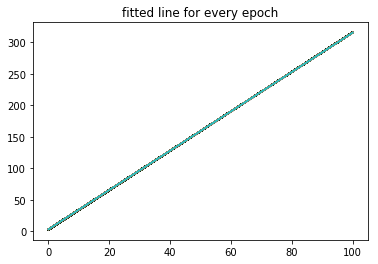

In [23]:
loss_list=[]
for epoch in range(epochs):
    _,loss=sess.run([optimizer,loss_function],feed_dict={x:x_data,y:y_data})
    loss_list.append(loss)
    wtemp=w.eval(session=sess)
    btemp=b.eval(session=sess)
    print ('第%2d轮'%(epoch+1),'w:%.4f'%wtemp,'b:%.4f'%btemp,'损失%.4f'%loss)
    plt.plot(x_data,wtemp*x_data+btemp)
    plt.title('fitted line for every epoch')

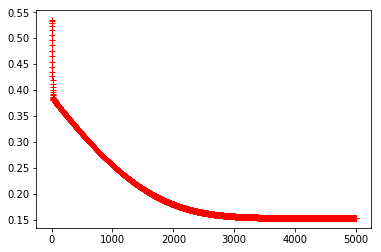

In [24]:
plt.plot(range(1,epochs+1),loss_list,'r+')

In [25]:
print ('y=%.4f when x=5.79'%sess.run(pred,feed_dict={x:5.79}))

y=21.0833 when x=5.79
